In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


Step-2:- 
print statement is just used for an enhancing purpose
1. URL:-           defines the website's URL from which data will be fetched.
2. get:-           used to send requests to the URL.
3. Beautifulsoup:- used for extracting html content from the website.

In [3]:
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("                  Results of Lok Sabha Elections                   ") 
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                  Results of Lok Sabha Elections                   
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Step-3:- Find all tables in the above parsed html.
1. th:-        used to extract the headers from html content.
2. .text:-     used for extracting only text files from the content according to the given tags.
3. .strip:-    used stripping or removing any white spaces in column names.
4. .find_all:- used to find the whole content according to the arguments and the parameters.

In [4]:
tables = soup.find_all('table')

#Extract headers
headers = soup.find_all('th')[0:4]
headers = [ele.text.strip() for ele in headers]

Step-4:- Extracting and saving data(into a csv file).
1. Dataframe:-          the csv file is read into the dataframe(a kind of sheet containing rows and columns).
2. dropna:-             used for sake of convenience as this function drops the rows which contain some null values.
3. .columns.str.strip:- used for stripping any whitespaces in column names.
4. read_csv:-           reads and loads the csv file as the given path.

In [5]:
data = []
for table in tables:
    rows = table.find_all('tr')
    for row in rows[1:]:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append(cols)
df = pd.DataFrame(data, columns=headers)
df.to_csv("C:/Users/ASUS/Desktop/data/lok_sabha_results.csv", index=False)

df = pd.read_csv('C:/Users/ASUS/Desktop/data/lok_sabha_results.csv')
df.dropna(inplace=True)
df.columns = df.columns.str.strip()

Step-5:- plotting the winning pie chart.
1. plt:- file is imported from matplotlib.pyplot and gives a piechart as an output.

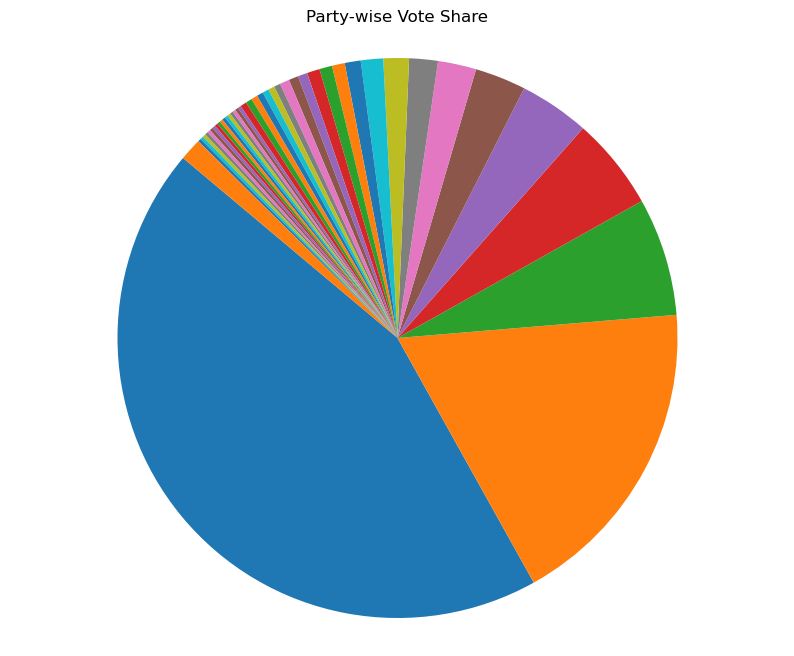

In [6]:
plt.figure(figsize=(10, 8))
plt.pie(df['Won'], startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Party-wise Vote Share')
plt.show()

Step-6:- making pie chart more informative.
1. .cm.tab20.colors:- defines a color palette.
2. legend:-            used to associate party names with chart slices

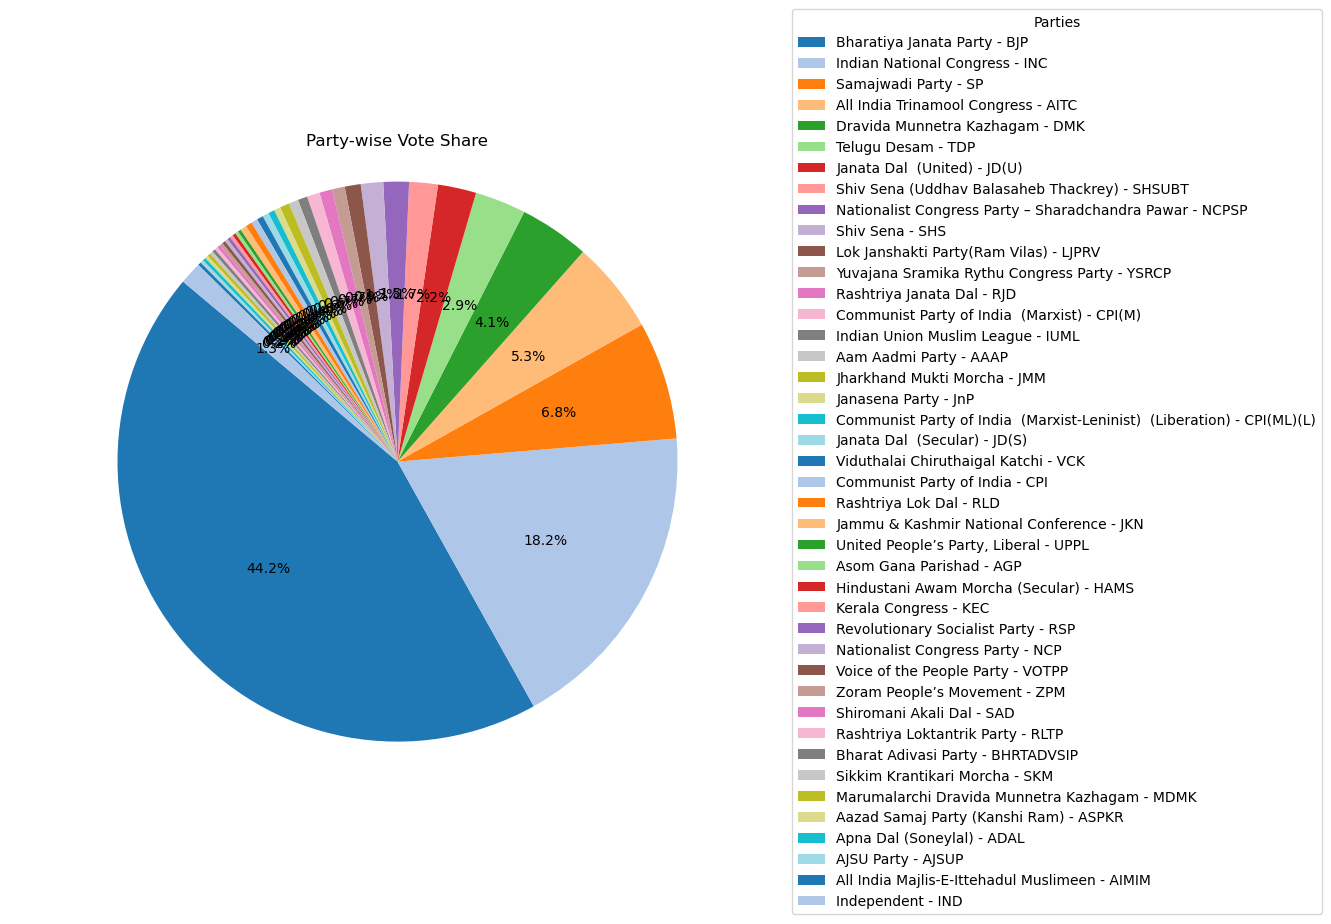

In [7]:
colors = plt.cm.tab20.colors
# Plot pie chart of party-wise vote share
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(df['Won'], autopct='%1.1f%%', startangle=140, colors=colors)

# Add a legend with party names and corresponding colors
plt.legend(wedges, df['Party'], title="Parties", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Party-wise Vote Share')
plt.savefig('party_wise_vote_share.png')
plt.show()

Step-7:- extracting 10 key insights from the data.
1. while:- loop representing an interactive menu with 10 key insights.
2. choice:- a variable created which basically an input from the user.

Key insights:-
1. Total Seats:-
2. Winning Party:-
3. Top 5 Parties by Seats Won:-
4. Total Seats Won:-
5. Total Seats Leading:-
6. Party with Most Leading Seats:-
7. Top 5 Parties by Leading Seats:-
8. Winning Party Percentage of Total Seats:-
9. Number of Parties with At Least One Seat:-
10. Total Number of Parties Participated:-

In [ ]:
while True:
    print()
    print("10 Key Insights:-")
    print()
    print("1.Total Seats")
    print("2.Winning Party")
    print("3.Top 5 Parties by Seats Won")
    print("4.Total Seats Won")
    print("5.Total Seats Leading")
    print("6.Party with Most Leading Seats")
    print("7.Top 5 Parties by Leading Seats")
    print("8.Winning Party Percentage of Total Seats")
    print("9.Number of Parties with At Least One Seat")
    print("10.Total Number of Parties Participated")
    print("Enter 0 for exit")

    choice=int(input("Enter your choice: "))
    
    if choice == 1:
        total_seats = df['Total'].astype(int).sum()
        print(total_seats)
        
    elif choice == 2:
        winning_party = df.loc[df['Won'].astype(int).idxmax()]['Party']
        print(winning_party)
        
    elif choice == 3:
        top_5_parties = df[['Party', 'Won']].sort_values(by='Won', ascending=False).head(5)
        print(top_5_parties)
        
    elif choice == 4:
        total_won_seats = df['Won'].astype(int).sum()
        print(total_won_seats)
        
    elif choice == 5:
        total_leading_seats = df['Leading'].astype(int).sum()
        print(total_leading_seats)
        
    elif choice == 6:
        leading_party = df.loc[df['Leading'].astype(int).idxmax()]['Party']
        print(leading_party)
        
    elif choice == 7:
        top_5_leading_parties = df[['Party', 'Leading']].sort_values(by='Leading', ascending=False).head(5)
        print(top_5_leading_parties)
        
    elif choice == 8:
        winning_party_seats = df[df['Party'] == winning_party]['Won'].astype(int).sum()
        winning_party_percentage = (winning_party_seats / total_seats) * 100
        print(winning_party_percentage)
        
    elif choice == 9:
        parties_with_seats = df[df['Won'].astype(int) > 0]['Party'].nunique()
        print(parties_with_seats)
        
    elif choice == 10:
        total_parties = df['Party'].nunique()
        print(total_parties)
        
    elif choice==0:
        print()
        print()
        print("***************THANK YOU***************")
        break

    else:
        print("ENTER A VALID NUMBER!!!")
        print()
        print()
        print()



10 Key Insights:-

1.Total Seats
2.Winning Party
3.Top 5 Parties by Seats Won
4.Total Seats Won
5.Total Seats Leading
6.Party with Most Leading Seats
7.Top 5 Parties by Leading Seats
8.Winning Party Percentage of Total Seats
9.Number of Parties with At Least One Seat
10.Total Number of Parties Participated
Enter 0 for exit


Enter your choice:  1


543

10 Key Insights:-

1.Total Seats
2.Winning Party
3.Top 5 Parties by Seats Won
4.Total Seats Won
5.Total Seats Leading
6.Party with Most Leading Seats
7.Top 5 Parties by Leading Seats
8.Winning Party Percentage of Total Seats
9.Number of Parties with At Least One Seat
10.Total Number of Parties Participated
Enter 0 for exit


Enter your choice:  7


                                        Party  Leading
0                Bharatiya Janata Party - BJP      0.0
31              Zoram People’s Movement - ZPM      0.0
23  Jammu & Kashmir National Conference - JKN      0.0
24      United People’s Party, Liberal - UPPL      0.0
25                   Asom Gana Parishad - AGP      0.0

10 Key Insights:-

1.Total Seats
2.Winning Party
3.Top 5 Parties by Seats Won
4.Total Seats Won
5.Total Seats Leading
6.Party with Most Leading Seats
7.Top 5 Parties by Leading Seats
8.Winning Party Percentage of Total Seats
9.Number of Parties with At Least One Seat
10.Total Number of Parties Participated
Enter 0 for exit
